In [532]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [533]:
# Read in data
data = Path("Resources/spotify_raw_data.csv")
df = pd.read_csv(data)
df.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,Jonas Blue,Mama - Acoustic,0.564,0.364,10,-5.845,0,0.0631,0.75900,...,0.591,86.538,audio_features,3VOtM6x5KXZuxSzHaaf9oO,spotify:track:3VOtM6x5KXZuxSzHaaf9oO,https://api.spotify.com/v1/tracks/3VOtM6x5KXZu...,https://api.spotify.com/v1/audio-analysis/3VOt...,192277,4,1
1,1,Jooyoung,Same as you,0.701,0.519,1,-6.382,1,0.0516,0.31400,...,0.498,89.977,audio_features,0wpskpgrWHEDWjPgkddspN,spotify:track:0wpskpgrWHEDWjPgkddspN,https://api.spotify.com/v1/tracks/0wpskpgrWHED...,https://api.spotify.com/v1/audio-analysis/0wps...,223044,4,1
2,2,Nightwish,The Poet And The Pendulum,0.309,0.740,7,-5.917,0,0.0456,0.00854,...,0.166,144.861,audio_features,2XD4JzbZWRuRKzzCi5Cocm,spotify:track:2XD4JzbZWRuRKzzCi5Cocm,https://api.spotify.com/v1/tracks/2XD4JzbZWRuR...,https://api.spotify.com/v1/audio-analysis/2XD4...,834720,4,1
3,3,Ed Sheeran,Afire Love,0.552,0.637,5,-6.568,1,0.0445,0.46400,...,0.333,97.970,audio_features,12B0Twa9kRz45Xw2PgXHJm,spotify:track:12B0Twa9kRz45Xw2PgXHJm,https://api.spotify.com/v1/tracks/12B0Twa9kRz4...,https://api.spotify.com/v1/audio-analysis/12B0...,314280,4,1
4,4,Linkin Park,Given Up,0.655,0.885,7,-4.116,1,0.0438,0.00117,...,0.938,100.088,audio_features,1fLlRApgzxWweF1JTf8yM5,spotify:track:1fLlRApgzxWweF1JTf8yM5,https://api.spotify.com/v1/tracks/1fLlRApgzxWw...,https://api.spotify.com/v1/audio-analysis/1fLl...,189293,4,1


In [534]:
df.columns

Index(['Unnamed: 0', 'artist', 'track', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'target'],
      dtype='object')

In [535]:
raw_data = df.drop(['Unnamed: 0',"artist","track","type","id","uri","track_href","analysis_url","time_signature"],axis=1)
raw_data.head(20)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target
0,0.564,0.364,10,-5.845,0,0.0631,0.759000,0.000000,0.0839,0.591,86.538,192277,1
1,0.701,0.519,1,-6.382,1,0.0516,0.314000,0.000000,0.2070,0.498,89.977,223044,1
2,0.309,0.740,7,-5.917,0,0.0456,0.008540,0.025800,0.1190,0.166,144.861,834720,1
3,0.552,0.637,5,-6.568,1,0.0445,0.464000,0.000016,0.1360,0.333,97.970,314280,1
4,0.655,0.885,7,-4.116,1,0.0438,0.001170,0.000473,0.0448,0.938,100.088,189293,1
5,0.564,0.534,4,-6.050,1,0.0238,0.280000,0.000000,0.1210,0.409,85.964,206533,1
6,0.754,0.613,5,-6.342,1,0.2290,0.318000,0.000000,0.3350,0.904,113.196,208400,1
7,0.414,0.708,0,-4.181,0,0.0912,0.031600,0.000000,0.0623,0.392,199.900,240039,1
8,0.749,0.955,7,-1.767,1,0.0867,0.054700,0.000000,0.1120,0.761,111.960,186875,1
9,0.477,0.946,5,-6.734,1,0.0423,0.000061,0.027100,0.3330,0.563,79.948,233800,1


In [536]:
# Define the features X set and the target y vector
X = raw_data.drop("target",axis=1).values
y = raw_data["target"].values


In [537]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [538]:
# Define the model - shallow neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=12, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [539]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Fit the model
model = nn.fit(X, y, epochs=300,verbose=0)

In [540]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("Resources/model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "Resources/model.h5"
nn.save_weights("Resources/model.h5")

In [541]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("Resources/model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = "Resources/model.h5"
loaded_model.load_weights(file_path)


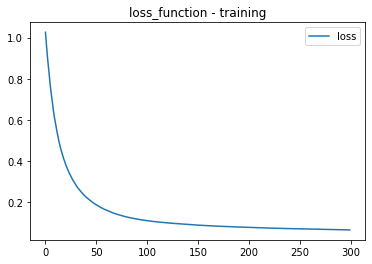

In [542]:
# Plot the train function
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(model.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

In [553]:
# Make some predictions with the loaded model
raw_data["predicted"] = loaded_model.predict(X)
raw_data.head(30)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target,predicted
0,0.564,0.364,10,-5.845,0,0.0631,0.759000,0.000000,0.0839,0.591,86.538,192277,1,0.671983
1,0.701,0.519,1,-6.382,1,0.0516,0.314000,0.000000,0.2070,0.498,89.977,223044,1,0.541683
2,0.309,0.740,7,-5.917,0,0.0456,0.008540,0.025800,0.1190,0.166,144.861,834720,1,1.069774
3,0.552,0.637,5,-6.568,1,0.0445,0.464000,0.000016,0.1360,0.333,97.970,314280,1,0.812207
4,0.655,0.885,7,-4.116,1,0.0438,0.001170,0.000473,0.0448,0.938,100.088,189293,1,0.510204
5,0.564,0.534,4,-6.050,1,0.0238,0.280000,0.000000,0.1210,0.409,85.964,206533,1,0.594564
6,0.754,0.613,5,-6.342,1,0.2290,0.318000,0.000000,0.3350,0.904,113.196,208400,1,0.331507
7,0.414,0.708,0,-4.181,0,0.0912,0.031600,0.000000,0.0623,0.392,199.900,240039,1,0.766543
8,0.749,0.955,7,-1.767,1,0.0867,0.054700,0.000000,0.1120,0.761,111.960,186875,1,0.579011
9,0.477,0.946,5,-6.734,1,0.0423,0.000061,0.027100,0.3330,0.563,79.948,233800,1,0.834646


In [544]:
# Evaluate the model with the MSE metric
model_loss, model_accuracy = nn.evaluate(X, y, verbose=2)

print(f"Loss: {round(model_loss,4)} \nAccuracy: {round((model_accuracy*100),4)}%")

4/4 - 0s - loss: 0.0648 - accuracy: 0.9364 - 69ms/epoch - 17ms/step
Loss: 0.0648 
Accuracy: 93.6364%


In [545]:
data2 = Path("Resources/test_playlist.csv")
df_test = pd.read_csv(data2)
df_test.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Within Temptation,Intro,0.142,0.451,5,-10.484,0,0.0380,0.6790,...,0.2050,0.0393,139.715,audio_features,1OGjrTzzqENqBJqSpxPqc5,spotify:track:1OGjrTzzqENqBJqSpxPqc5,https://api.spotify.com/v1/tracks/1OGjrTzzqENq...,https://api.spotify.com/v1/audio-analysis/1OGj...,118107,4
1,1,Within Temptation,See Who I Am,0.319,0.921,11,-4.250,0,0.0690,0.1050,...,0.2500,0.2740,187.411,audio_features,5KRuT1HU5BtXELm6zXKhfQ,spotify:track:5KRuT1HU5BtXELm6zXKhfQ,https://api.spotify.com/v1/tracks/5KRuT1HU5BtX...,https://api.spotify.com/v1/audio-analysis/5KRu...,291533,3
2,2,Within Temptation,Jillian (I'd Give My Heart),0.407,0.826,9,-6.230,0,0.0474,0.0465,...,0.0981,0.2840,168.030,audio_features,1wDDWn5UjpjbT9onEAbL4n,spotify:track:1wDDWn5UjpjbT9onEAbL4n,https://api.spotify.com/v1/tracks/1wDDWn5Ujpjb...,https://api.spotify.com/v1/audio-analysis/1wDD...,286680,4
3,3,Within Temptation,Stand My Ground,0.271,0.866,5,-4.072,0,0.0578,0.0489,...,0.1160,0.1270,175.665,audio_features,7Chqf4yGnQlLWAWic9b0ET,spotify:track:7Chqf4yGnQlLWAWic9b0ET,https://api.spotify.com/v1/tracks/7Chqf4yGnQlL...,https://api.spotify.com/v1/audio-analysis/7Chq...,267987,4
4,4,Within Temptation,Pale,0.437,0.740,9,-5.656,0,0.0318,0.6530,...,0.0743,0.1780,108.043,audio_features,1s2WhoEu2w7ZKXLhjfIQZE,spotify:track:1s2WhoEu2w7ZKXLhjfIQZE,https://api.spotify.com/v1/tracks/1s2WhoEu2w7Z...,https://api.spotify.com/v1/audio-analysis/1s2W...,268413,4


In [550]:
test_data = df_test.drop(['Unnamed: 0',"artist","track","type","id","uri","track_href","analysis_url","time_signature"],axis=1)
test_data.head(20)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.142,0.451,5,-10.484,0,0.0380,0.67900,0.977000,0.2050,0.0393,139.715,118107
1,0.319,0.921,11,-4.250,0,0.0690,0.10500,0.000000,0.2500,0.2740,187.411,291533
2,0.407,0.826,9,-6.230,0,0.0474,0.04650,0.000105,0.0981,0.2840,168.030,286680
3,0.271,0.866,5,-4.072,0,0.0578,0.04890,0.000762,0.1160,0.1270,175.665,267987
4,0.437,0.740,9,-5.656,0,0.0318,0.65300,0.000076,0.0743,0.1780,108.043,268413
5,0.446,0.922,9,-4.555,0,0.0662,0.00864,0.000127,0.1020,0.2360,98.994,293493
6,0.341,0.867,7,-4.727,0,0.0492,0.29300,0.000000,0.2570,0.2000,182.032,240440
7,0.430,0.676,10,-7.367,0,0.0272,0.15000,0.000002,0.1870,0.2150,90.927,231187
8,0.397,0.929,7,-3.779,0,0.1160,0.10700,0.000158,0.3170,0.2290,143.998,286680
9,0.484,0.842,0,-4.026,1,0.0332,0.00282,0.003090,0.1700,0.5180,94.044,246840


In [551]:
X2 = test_data.values

test_data["predicted"] = loaded_model.predict(X2)
test_data.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,predicted
0,0.142,0.451,5,-10.484,0,0.0380,0.67900,0.977000,0.2050,0.0393,139.715,118107,18363.083984
1,0.319,0.921,11,-4.250,0,0.0690,0.10500,0.000000,0.2500,0.2740,187.411,291533,45334.390625
2,0.407,0.826,9,-6.230,0,0.0474,0.04650,0.000105,0.0981,0.2840,168.030,286680,44580.320312
3,0.271,0.866,5,-4.072,0,0.0578,0.04890,0.000762,0.1160,0.1270,175.665,267987,41673.484375
4,0.437,0.740,9,-5.656,0,0.0318,0.65300,0.000076,0.0743,0.1780,108.043,268413,41741.226562
5,0.446,0.922,9,-4.555,0,0.0662,0.00864,0.000127,0.1020,0.2360,98.994,293493,45642.203125
6,0.341,0.867,7,-4.727,0,0.0492,0.29300,0.000000,0.2570,0.2000,182.032,240440,37388.570312
7,0.430,0.676,10,-7.367,0,0.0272,0.15000,0.000002,0.1870,0.2150,90.927,231187,35951.625000
8,0.397,0.929,7,-3.779,0,0.1160,0.10700,0.000158,0.3170,0.2290,143.998,286680,44581.531250
9,0.484,0.842,0,-4.026,1,0.0332,0.00282,0.003090,0.1700,0.5180,94.044,246840,38387.601562


In [552]:
test_data.head(30)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,predicted
0,0.142,0.451,5,-10.484,0,0.0380,0.67900,0.977000,0.2050,0.0393,139.715,118107,18363.083984
1,0.319,0.921,11,-4.250,0,0.0690,0.10500,0.000000,0.2500,0.2740,187.411,291533,45334.390625
2,0.407,0.826,9,-6.230,0,0.0474,0.04650,0.000105,0.0981,0.2840,168.030,286680,44580.320312
3,0.271,0.866,5,-4.072,0,0.0578,0.04890,0.000762,0.1160,0.1270,175.665,267987,41673.484375
4,0.437,0.740,9,-5.656,0,0.0318,0.65300,0.000076,0.0743,0.1780,108.043,268413,41741.226562
5,0.446,0.922,9,-4.555,0,0.0662,0.00864,0.000127,0.1020,0.2360,98.994,293493,45642.203125
6,0.341,0.867,7,-4.727,0,0.0492,0.29300,0.000000,0.2570,0.2000,182.032,240440,37388.570312
7,0.430,0.676,10,-7.367,0,0.0272,0.15000,0.000002,0.1870,0.2150,90.927,231187,35951.625000
8,0.397,0.929,7,-3.779,0,0.1160,0.10700,0.000158,0.3170,0.2290,143.998,286680,44581.531250
9,0.484,0.842,0,-4.026,1,0.0332,0.00282,0.003090,0.1700,0.5180,94.044,246840,38387.601562
